<a href="https://colab.research.google.com/github/poojanalan10/OregonHighway/blob/main/DataEng_Validation_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from urllib.request import urlopen
from google.colab import drive
from pandas import DataFrame
import matplotlib.pyplot as plt
from tabulate import _table_formats, tabulate
import datetime
data = pd.ExcelFile('https://github.com/poojanalan10/OregonHighway/blob/main/Oregon%20Hwy%2026%20Crash%20Data%20for%202019.xlsx?raw=true')
sheetname = data.sheet_names[0]
df = data.parse(sheetname)
df.head(10)

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,...,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,27.0,40.62,-122.0,22.0,59.23,0.0,NaN,NaN,NaN,NaN,NaN,9.0,16.77,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,47.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,66.0,1.0,1.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN
5,1809229,1,NaN,NaN,NaN,NaN,NaN,2405.0,3.0,3.0,2019.0,1.0,2.0,3.0,185.0,68.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,24.0,20.47,-122.0,17.0,37.30,0.0,NaN,1504.0,426,1.0,NaN,4.0,22.59,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1809229,2,3409765.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
#Existence assertions
#crashID is unique for every crash and should not be NULL
crash_id = df['Crash ID']
count_null_id = 0
count_notnull_id = 0
pos = []
for id in crash_id:
  if id == 0:
    count_null_id += 1
    pos.add(i)
    print('Crash ID can\'t be null')
  else:
   count_notnull_id += 1
print('Total Crash ID count : ' + str(crash_id.count()))
print('No of null IDs : '+ str(count_null_id))
print('The index number for null ID : ' + str(pos))
print('The count of IDs not null : ' + str(count_notnull_id))

#Every record has a highway number 26
CrashesDF = df[df['Record Type'] == 1]
crash_id = CrashesDF['Crash ID']
highway_number = CrashesDF['Highway Number']
right_highway_number = {}
wrong_highway_number = {}
temp = []
for a, b in zip(CrashesDF['Crash ID'], CrashesDF['Highway Number']):
  if b == 26:
    right_highway_number[a] = b
  else:
    wrong_highway_number[a] = b
print("Total record count")
print(highway_number.count())
print("Right highway number count:")
print(len(right_highway_number))
print("Wrong highway number count:")
print(len(wrong_highway_number))

#The date field should be starting from 1/1/2019 and 12/31/2019 inclusive
import math
datesinRange = []
datesOutofRange = []
try:
  count = 0
  for m,d,y in zip(CrashesDF['Crash Month'],CrashesDF['Crash Day'],CrashesDF['Crash Year']):
    if (math.floor(d) >= 1 and math.floor(d) <= 31) and (math.floor(m) >= 1 and math.floor(m) <= 12) and math.floor(y) == 2019:
      count += 1
      datesinRange.append(str(math.floor(m))+"/"+str(math.floor(d))+"/"+str(math.floor(y)))
    else:
     datesOutofRange.append(str(math.floor(m))+"/"+str(math.floor(d))+"/"+str(math.floor(y)))

  print("Dates between(1/1/2019,12/31/2019)")
  print(datesinRange)
  print("Dates out of range")
  print(datesOutofRange)
except Exception as e:
  print(e)

Total Crash ID count : 2739
No of null IDs : 0
The index number for null ID : []
The count of IDs not null : 2739
Total record count
508
Right highway number count:
508
Wrong highway number count:
0
Dates between(1/1/2019,12/31/2019)
['3/14/2019', '3/3/2019', '5/17/2019', '4/7/2019', '7/8/2019', '10/28/2019', '11/23/2019', '1/11/2019', '1/18/2019', '4/15/2019', '8/24/2019', '1/1/2019', '7/5/2019', '10/17/2019', '9/12/2019', '1/9/2019', '2/18/2019', '1/4/2019', '7/19/2019', '6/29/2019', '6/22/2019', '5/5/2019', '1/5/2019', '1/7/2019', '1/8/2019', '1/8/2019', '2/18/2019', '5/31/2019', '3/23/2019', '2/24/2019', '1/5/2019', '1/13/2019', '1/29/2019', '7/1/2019', '7/20/2019', '6/1/2019', '6/14/2019', '6/27/2019', '3/2/2019', '3/3/2019', '3/2/2019', '5/6/2019', '3/16/2019', '1/3/2019', '1/9/2019', '1/9/2019', '2/2/2019', '1/12/2019', '1/15/2019', '1/18/2019', '2/6/2019', '1/23/2019', '1/8/2019', '1/8/2019', '2/12/2019', '2/13/2019', '2/13/2019', '1/26/2019', '3/19/2019', '1/9/2019', '1/9/2019

**Limit Assertions:**

*  The record type field ranges from 1 to 3
*  All the crash type ranges from 2 to 5
*  The collision type ranges from 0 to 6








In [ ]:
#All the crash type ranges from 2 to 5
crash_type = CrashesDF['Crash Type']
print(crash_type.between(2,5))

#The collision type ranges from 0 to 6
collision_type = CrashesDF['Collision Type']
print(collision_type.between(0,6))

0       True
5       True
9       True
12      True
16      True
        ... 
2716    True
2719    True
2724    True
2729    True
2734    True
Name: Crash Type, Length: 508, dtype: bool
0       True
5       True
9       True
12      True
16      True
        ... 
2716    True
2719    True
2724    True
2729    True
2734    True
Name: Collision Type, Length: 508, dtype: bool


**Intra record assertions**

*   When highway number is entered then the Impact Locationbe a numeric value <= 14
*   Every crash ID should be 7 digits long.
*   All the vehicle ID associated with crash ID should not be greater than 7 digits long.





In [ ]:
# Intra-record assertions
# When highway number is entered then the Impact Locationbe a numeric value <= 14
count = 0
LocImpt = 0
try:
  for hn,locationImpact in zip(CrashesDF['Highway Number'],CrashesDF['Impact Location']):
    if hn is not None and int(locationImpact) <= 14:
      print(locationImpact)
      print(int(locationImpact) <= 14)
      count += 1
    else:
      print("Crash ID ", cid)
      print("Location impact must be <= 14 if highway number is entered ")
except Exception as e:
  print("invalid data: ",e)

#Every crash ID should be 7 digits long.
try:
  print(CrashesDF['Crash ID'].apply(lambda x: len(str(x)) == 7))
except Exception as e:
  print(e)
    
#All the vehicle ID associated with crash ID should not be greater than 7 digits long.
try:
  vehiclesDF = df[df['Record Type'] == 2]
  print(vehiclesDF['Vehicle ID'].apply(lambda x: len(str(x)) == 7))
except Exception as e:
  print(e)


 
 


6
True
0
True
9
True
0
True
1
True
6
True
9
True
2
True
6
True
8
True
4
True
0
True
3
True
1
True
6
True
0
True
3
True
1
True
4
True
5
True
9
True
6
True
3
True
3
True
3
True
2
True
9
True
6
True
9
True
3
True
6
True
4
True
6
True
9
True
6
True
8
True
invalid data:  invalid literal for int() with base 10: '&'
0       True
5       True
9       True
12      True
16      True
        ... 
2716    True
2719    True
2724    True
2729    True
2734    True
Name: Crash ID, Length: 508, dtype: bool
'Record Type'


**Inter record assertions**

*   ALCHL_INVLV_FLG. Every crash has a alcohol involved flag which takes values 0 or 1 indicating if the crash involved the participant consuming alcohol.
*  Crash severity is code number is 1, 70% of the time
*  68% of the time the weather when the accident occured is ‘Clear’









0       True
5       True
9       True
12      True
16      True
        ... 
2716    True
2719    True
2724    True
2729    True
2734    True
Name: Alcohol-Involved Flag, Length: 508, dtype: bool

Value Count of severity code:
1.0    351
2.0    119
4.0     14
3.0     12
0.0     12
Name: Crash Severity, dtype: int64


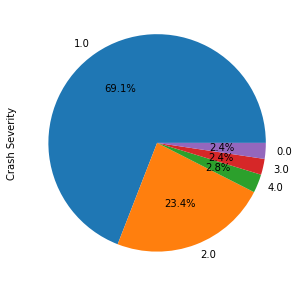

  Code  Description
------  ------------------------
     0  Unkown
     1  Clear
     2  Cloudy
     3  Rain
     4  Freezing Rain/Hail/Sleet
     5  Fog
     6  Snow
     7  Dust
     8  Smoke
     9  Ash

 Weather conditions code mapping:
1.0    346
2.0     89
3.0     37
5.0     19
4.0     16
0.0      1
Name: Weather Condition, dtype: int64


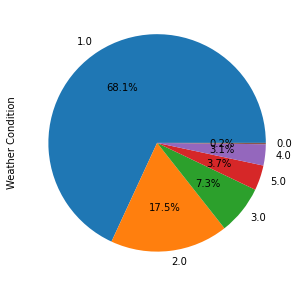

In [ ]:
#Every crash has a alcohol involved flag which takes values 0 or 1 indicating if the crash involved the participant consuming alcohol.
try:
  alcohol_involve_flag = CrashesDF['Alcohol-Involved Flag']
  print(alcohol_involve_flag.between(0,1))
except Exception as e:
  print(e)

#Crash severity is code number is 1, approx 70% of the time
try:
  crash_severity_code = CrashesDF['Crash Severity']
  vc = crash_severity_code.value_counts()
  print(f"\nValue Count of severity code:\n{vc}")
  vc.plot.pie(figsize=(5,5),autopct='%1.1f%%')
  plt.show()
 
except Exception as e:
  print(e)

#68% of the time the weather when the accident occured is ‘Clear’
try:
  weather = CrashesDF['Weather Condition']
  vc = weather.value_counts()
  data = [[0,'Unkown'],[1,'Clear'],[2,'Cloudy'],[3,'Rain'],[4,'Freezing Rain/Hail/Sleet'],[5,'Fog'],[6,'Snow'],[7,'Dust'],[8,'Smoke'],[9,'Ash']]
  print(tabulate(data, headers=["Code","Description"]))
  print(f"\n Weather conditions code mapping:\n{vc}")
  vc.plot.pie(figsize=(5,5),autopct='%1.1f%%')
except Exception as e:
  print(e)


**Summary assertions**

*   Every crash has a unique participant ID
*   Every crash has a unique vehicle ID.
*   Every crash has a unique vehicle coded sequence number.










In [ ]:
#Every crash has a unique participant ID
try:
  participantsDF = df[df['Record Type'] == 3]
  participant_id = participantsDF['Participant ID']
  print("No of unique participant IDs")
  print(len(participant_id.unique()))
  print("No of participant IDs")
  print(len(participant_id))
  if len(participant_id.unique()) == len(participant_id):
    print("All the participant IDs are unique")
  else:
    print("Not all the participant IDs are unique")
except Exception as e:
  print(e)

#Every crash has a unique vehicle ID
try:
  vehiclesDF = df[df['Record Type'] == 2]
  vehicle_id = vehicleDF['Vehicle ID']
  print("No of unique vehicle IDs")
  print(len(vehicle_id.unique()))
  print("No of vehicle IDs")
  print(len(vehicle_id))
  if len(vehicle_id.unique()) == len(vehicle_id):
    print("All the vehicle IDs are unique")
  else:
    print("Not all the vehicle IDs are unique")
except Exception as e:
  print(e)

#Every crash has a vehicle coded sequence number assigned sequentially from 01-99 according to the manual and it is from 1 to 4 here.

try:
  vehiclesDF = df[df['Record Type'] == 2]
  vehicle_coded_sequence = vehiclesDF['Vehicle Coded Seq#']
  print("Total count of coded sequence numbers:")
  print(vehicle_coded_sequence.count())
  print("Count of vehicle coded sequence numbers between 1 and 4:")
  print(vehicle_coded_sequence.between(1,4)) 
except Exception as e:
  print(e)

No of unique participant IDs
1216
No of participant IDs
1216
All the participant IDs are unique
No of unique vehicle IDs
1008
No of vehicle IDs
1216
Not all the vehicle IDs are unique
Total count of coded sequence numbers:
1015
Count of vehicle coded sequence numbers between 1 and 4:
1       True
3       True
6       True
10      True
13      True
        ... 
2727    True
2730    True
2732    True
2735    True
2737    True
Name: Vehicle Coded Seq#, Length: 1015, dtype: bool


** referential integrity insertions**

*   NHS flag takes value 0 or 1 based on whether a crash occurred on a national highway or not
*   Vehicle ID is generated for every crash that has occured .



In [ ]:
#NHS flag takes value 0 or 1 based on whether a crash occurred on a national highway or not
CrashesDF = df[df['Record Type'] == 1]
nhs_flag = CrashesDF['NHS Flag']
try:
  check_nhs_flag = nhs_flag.between(0,1)
  print("NHS flag assigned as either 0 or 1")
except Exception as e:
  print(e)

#Vehicle ID is generated for every crash that has occured for every participant 
try:
  vehicleDF = df[df['Record Type'] == 3]
  vehicleID = vehicleDF['Vehicle ID']
  for crash_id, vehicle_id in zip(CrashesDF['Crash ID'],vehicleID ):
    if crash_id is not None and vehicle_id is not None:
      data.append([crash_id,vehicle_id])
      continue
    else:
      print("Crash ID should not be null and vehicle id should be assigned")
  print(tabulate(data,headers=["Crash ID","Vehicle ID"]))
except Exception as e:
  print(e)

NHS flag assigned as either 0 or 1
  Crash ID  Vehicle ID
----------  ------------------------
         0  Unkown
         1  Clear
         2  Cloudy
         3  Rain
         4  Freezing Rain/Hail/Sleet
         5  Fog
         6  Snow
         7  Dust
         8  Smoke
         9  Ash
   1809119  3409578.0
   1809229  3409579.0
   1809637  3409765.0
   1810874  0.0
   1812266  3410470.0
   1815964  3412622.0
   1816804  0.0
   1826266  3415030.0
   1826321  3415031.0
   1826490  3415031.0
   1826513  3415032.0
   1826673  3415033.0
   1826794  3421313.0
   1826971  3421314.0
   1827119  3422688.0
   1827863  3439374.0
   1827872  3439374.0
   1827907  3439375.0
   1828231  3439466.0
   1828287  3439467.0
   1828314  3439467.0
   1828373  3439761.0
   1828552  3439797.0
   1828709  3439798.0
   1828977  3439799.0
   1828982  3439799.0
   1829693  3440070.0
   1829718  0.0
   1829755  0.0
   1829763  0.0
   1829797  3440278.0
   1829853  3440279.0
   1829867  3440279.0
   1829871  344

**Statistical assertion**


*  Crashes are distributed over the different days of a week
*  Every crash has a number that is assigned by the Driver and Motor Vehicle Services (DMV) division.
*  The majority of the highway system is regular mileage i.e mileage type is 0






  Code  Week Day
------  ----------
     1  Sunday
     2  Monday
     3  Tuesday
     4  Wednesday
     5  Thursday
     6  Friday
     7  Saturday

Value Count of crashes for week day:
7.0    83
6.0    77
3.0    75
4.0    74
2.0    71
5.0    68
1.0    60
Name: Week Day Code, dtype: int64


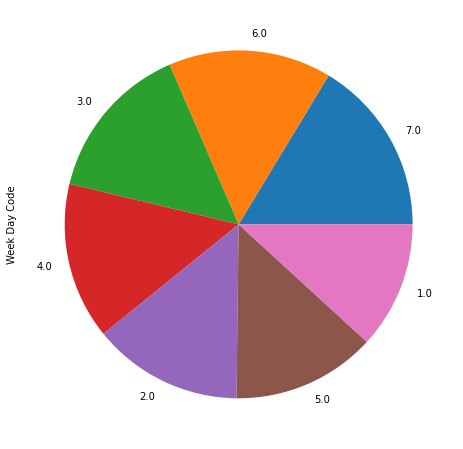

0       True
5       True
9       True
12      True
16      True
        ... 
2716    True
2719    True
2724    True
2729    True
2734    True
Name: Serial #, Length: 508, dtype: bool


In [ ]:
#All the crashes are distributed over all the days of a week over the year
vc = CrashesDF['Week Day Code'].value_counts()
data = [[1,'Sunday'],[2,'Monday'],[3,'Tuesday'],[4,'Wednesday'],[5,'Thursday'],[6,'Friday'],[7,'Saturday']]
print(tabulate(data, headers = ["Code","Week Day"]))
print(f"\nValue Count of crashes for week day:\n{vc}")
vc.plot.pie(figsize=(8,8))
plt.show()

#Every crash has a number that is assigned by the Driver and Motor Vehicle Services (DMV) division. 
serial_number = pd.notnull(CrashesDF['Serial #'])
print(serial_number)

#The majority of the highway system is regular mileage i.e mileage type is 0
try:
  mileage_type = CrashesDF['Mileage Type']
  mileage_type.equals(0)
except Exception as e:
  print(e)





**Google doc assignment sheet** 

 https://docs.google.com/document/d/1-DKozOTuxGPWjU0P8Wrujl5XDWDqmxE3vxU_0dLR5o4/edit#